In [9]:
pip install google-play-scraper pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
from datetime import datetime, date, time, timedelta

In [21]:
from google_play_scraper import Sort, reviews
import pandas as pd

result, _ = reviews(
    'cx.indianoil.in',  # Replace with real app ID
    lang='en',
    country='IN',
    sort=Sort.NEWEST,
    count=20000
)

df = pd.DataFrame(result)
df[['userName', 'score', 'at', 'content']].to_csv('playstore_reviews.csv', index=False)

In [24]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,6f147582-e9e2-41ef-99de-1aab5edbf0b7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good service,5,0,3.1.80,2025-06-19 11:16:31,None,NaT,3.1.80
1,e0582f17-c76d-4f8c-a602-b4779c3e12d3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,🙏 धन्यवाद Indian Gas App Team 🙏 मैं आपका आभारी...,5,0,3.1.80,2025-06-19 11:09:08,None,NaT,3.1.80
2,f7b3cf32-86d2-4acf-8f0e-dddb3df21919,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Excellent service 👌,5,0,3.1.74,2025-06-19 11:08:10,None,NaT,3.1.74
3,b3724440-ebc1-4d14-9f44-f3a377f89b20,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,goood,5,0,3.1.80,2025-06-19 11:06:24,None,NaT,3.1.80
4,57739779-f8d9-4a24-b76a-38ffa7c08bac,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nice,5,0,3.1.80,2025-06-19 11:01:34,None,NaT,3.1.80


In [25]:
df=df.drop("reviewId",axis=1)

In [26]:
df=df.drop("userName",axis=1)
df=df.drop("userImage",axis=1)
df=df.drop("replyContent",axis=1)
df=df.drop("repliedAt",axis=1)

In [27]:
df

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,good service,5,0,3.1.80,2025-06-19 11:16:31,3.1.80
1,🙏 धन्यवाद Indian Gas App Team 🙏 मैं आपका आभारी...,5,0,3.1.80,2025-06-19 11:09:08,3.1.80
2,Excellent service 👌,5,0,3.1.74,2025-06-19 11:08:10,3.1.74
3,goood,5,0,3.1.80,2025-06-19 11:06:24,3.1.80
4,nice,5,0,3.1.80,2025-06-19 11:01:34,3.1.80
...,...,...,...,...,...,...
19995,ok,5,0,3.1.35,2024-04-19 18:24:38,3.1.35
19996,Good app in india,5,0,3.1.35,2024-04-19 18:17:52,3.1.35
19997,super,5,0,3.1.35,2024-04-19 18:02:46,3.1.35
19998,good,5,0,3.1.35,2024-04-19 16:44:26,3.1.35


In [28]:
df.to_csv('playstore_reviews.csv', index=False)

In [29]:
df.to_csv('C:/Users/Prateek Kumar/Downloads/output.csv', index=False)

#Sentiment Analysis

In [30]:
! pip install pandas textblob nltk matplotlib

In [31]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Prateek
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Prateek Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [33]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re

In [34]:
# Download stopwords list
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Prateek
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
df = pd.read_csv('IndianOil One Review.csv')

In [37]:
df

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,good service,5,0,3.1.80,19-06-2025 11:16,3.1.80
1,🙏 धन्यवाद Indian Gas App Team 🙏 मैं आपका आभारी...,5,0,3.1.80,19-06-2025 11:09,3.1.80
2,Excellent service 👌,5,0,3.1.74,19-06-2025 11:08,3.1.74
3,goood,5,0,3.1.80,19-06-2025 11:06,3.1.80
4,nice,5,0,3.1.80,19-06-2025 11:01,3.1.80
...,...,...,...,...,...,...
19995,ok,5,0,3.1.35,19-04-2024 18:24,3.1.35
19996,Good app in india,5,0,3.1.35,19-04-2024 18:17,3.1.35
19997,super,5,0,3.1.35,19-04-2024 18:02,3.1.35
19998,good,5,0,3.1.35,19-04-2024 16:44,3.1.35


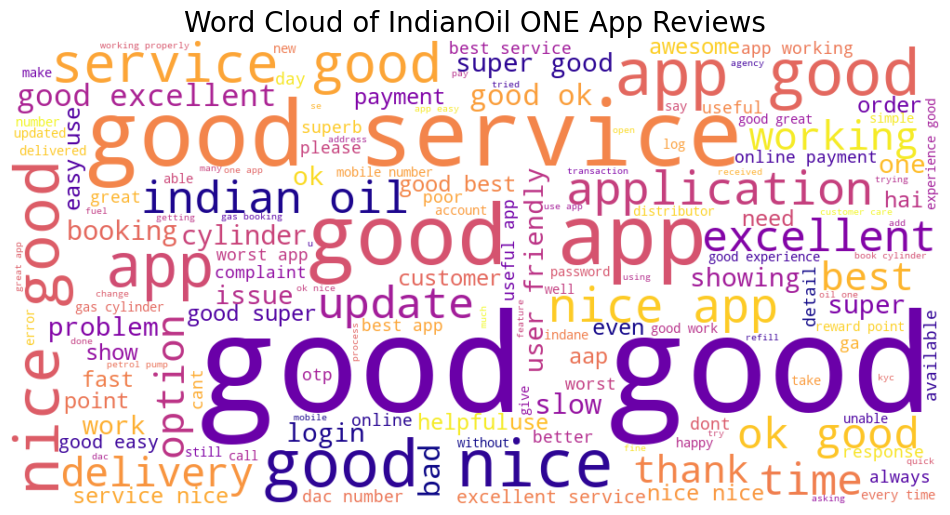

In [75]:
def clean_text(df):
    # Remove special characters and numbers
    df = re.sub(r"[^a-zA-Z\s]", "", df)
    # Convert to lowercase and split into words
    words = df.lower().split()
    # Remove stopwords
    cleaned_words = [word for word in words if word not in stop_words]
    return " ".join(cleaned_words)

df['cleaned_review'] = df['content'].astype(str).apply(clean_text)

full_text = " ".join(df['cleaned_review'])
#cleaned_text = clean_text(df)
#print(cleaned_text)


wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='plasma',
    max_words=150,
    contour_color='coolwarm',
    contour_width=3
).generate(full_text)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of IndianOil ONE App Reviews", fontsize=20)
plt.show()


In [84]:
plt.wordcloud("C:/Users/Prateek Kumar/Downloads/output.png", dpi=300)

AttributeError: module 'matplotlib.pyplot' has no attribute 'wordcloud'

In [65]:
df = df.dropna(subset=['content'])

In [66]:
df

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,cleaned_review,Polarity,Sentiment
0,good service,5,0,3.1.80,19-06-2025 11:16,3.1.80,good service,0.700000,Positive
1,🙏 धन्यवाद Indian Gas App Team 🙏 मैं आपका आभारी...,5,0,3.1.80,19-06-2025 11:09,3.1.80,indian gas app team thank positive response fa...,0.175758,Neutral
2,Excellent service 👌,5,0,3.1.74,19-06-2025 11:08,3.1.74,excellent service,1.000000,Positive
3,goood,5,0,3.1.80,19-06-2025 11:06,3.1.80,goood,0.000000,Neutral
4,nice,5,0,3.1.80,19-06-2025 11:01,3.1.80,nice,0.600000,Positive
...,...,...,...,...,...,...,...,...,...
19995,ok,5,0,3.1.35,19-04-2024 18:24,3.1.35,ok,0.500000,Positive
19996,Good app in india,5,0,3.1.35,19-04-2024 18:17,3.1.35,good app india,0.700000,Positive
19997,super,5,0,3.1.35,19-04-2024 18:02,3.1.35,super,0.333333,Positive
19998,good,5,0,3.1.35,19-04-2024 16:44,3.1.35,good,0.700000,Positive


In [43]:
# Function to calculate polarity
def get_sentiment(df):
    blob = TextBlob(df)
    return blob.sentiment.polarity

In [45]:
# Apply sentiment analysis
df['Polarity'] = df['content'].apply(get_sentiment)

In [46]:
df['Polarity']

0        0.700000
1        0.175758
2        1.000000
3        0.000000
4        0.600000
           ...   
19995    0.500000
19996    0.700000
19997    0.333333
19998    0.700000
19999    0.700000
Name: Polarity, Length: 20000, dtype: float64

In [47]:
# Classify sentiment
def classify_sentiment(score):
    if score > 0.2:
        return 'Positive'
    elif score < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(classify_sentiment)

In [49]:
# Show sample results
print(df[['content', 'Polarity', 'Sentiment']])


                                                 content  Polarity Sentiment
0                                           good service  0.700000  Positive
1      🙏 धन्यवाद Indian Gas App Team 🙏 मैं आपका आभारी...  0.175758   Neutral
2                                    Excellent service 👌  1.000000  Positive
3                                                  goood  0.000000   Neutral
4                                                   nice  0.600000  Positive
...                                                  ...       ...       ...
19995                                                 ok  0.500000  Positive
19996                                  Good app in india  0.700000  Positive
19997                                              super  0.333333  Positive
19998                                               good  0.700000  Positive
19999                                               Good  0.700000  Positive

[20000 rows x 3 columns]


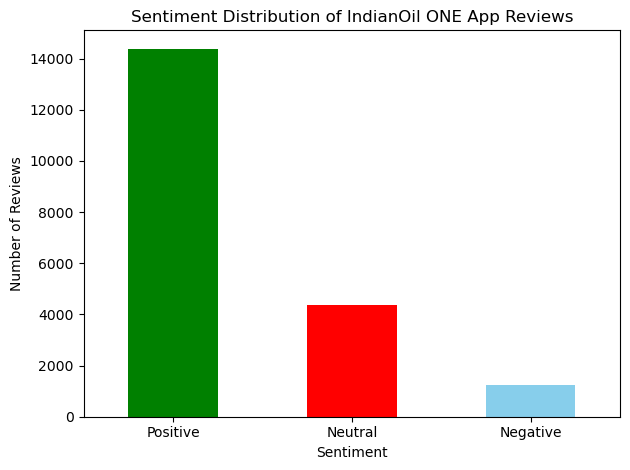

In [51]:
# Optional: Plot sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'skyblue'])
plt.title('Sentiment Distribution of IndianOil ONE App Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
